#Marketing A/B Testing.

---

**Why?**

Ingin mengetahui apakah strategi iklan saat ini ("Ad") efektif dalam meningkatkan conversion rate dan layak diterapkan secara luas.

---

**What?**

Utama:

Conversion rate -> proporsi pengguna yang `converted` ***= True*** pada masing-masing test group.

Additional:
`total ads`: untuk melihat korelasi antara intensitas iklan dan konversi.

---

**Who?**

`user_id` -> user yang mengunjungi website dari "ad" atau "psa".

---

**When?**

Durasi 1 bulan.

---
**Where?**

Users yang terpapar dalam website X, aplikasi X, dan digital campaign yang dilakukan.

---
**How?**

Penelitian ini menggunakan pendekatan Frequentist.

---

**Dampak terhadap Bisnis**:
Jika hasil menunjukkan bahwa iklan("ad") menghasilkan konversi lebih tinggi, perusahaan dapat meningkatkan ROI dengan mengalokasikan lebih banyak anggaran pada format tersebut. Namun, jika tidak ada perbedaan signifikan, bisnis dapat menghemat biaya dengan menurunkan intensitas iklan berbayar tanpa mengorbankan hasil konversi.



Hipotesis:

H0: Tidak ada perbedaan signifikan proporsi conversion rate antara pengguna dari group "Ad" dan dari group "PSA" .

H1: Proporsi conversion rate pengguna dari group "Ad" berbeda signifikan dari group "PSA".

Desain Pengujian:

-- Pembagian Group
*   Control Group: pengguna yang tetap menggunakan fitur/flow lama (label `psa`)
*   Target Group: pengguna yang mendapat fitur/flow baru (label `ad`)

-- Sample Size: Dari populasi sebesar 588101 orang, dengan tingkat kepercayaan (confidence level) 99%, standard deviasi 50%, dan margin kesalahan 5% didapatkan total minimum sampel sebanyak 665(menggunakan surveymonkey). Lalu lanjut dengan stratified random sampling, untuk menjaga proporsi tiap grup ("ad" dan "psa") agar sama seperti di populasi agar tidak ada bias.

-- Randomization: Pengguna dibagi secara acak ke dalam control (PSA) dan treatment (Ad) group menggunakan pendekatan stratified random sampling.

-- Durasi: Durasi bergantung pada trafik harian / jumlah user unik per hari yang eligible. Karena dataset besar, asumsi daily eligible users juga besar jadi durasi umumnya singkat.


In [ ]:
import matplotlib.pyplot as plt

import pandas as pd

from scipy import stats

from statsmodels.stats.weightstats import ttest_ind
import statsmodels as sm

from scipy.stats import chi2_contingency
import seaborn as sns

In [ ]:
df = pd.read_csv('marketing_AB.csv')

#A/B Testing

In [ ]:
#1 Tentukan ukuran total sampel
sample_size = 665 #Confidence level 99%, margin of error 5%

#2 Hitung proporsi tiap grup
group_counts = df["test group"].value_counts(normalize=True)
print("Proporsi di dataset asli:")
print(group_counts)

#3 Hitung jumlah sampel per grup berdasarkan proporsi
samples_per_group = (group_counts * sample_size).round().astype(int)
print("\nJumlah sampel per grup:")
print(samples_per_group)

#4 Ambil sampel acak dari masing-masing grup
sample_df = (
    df.groupby("test group", group_keys=False)
      .apply(lambda x: x.sample(n=samples_per_group[x.name], random_state=42))
)

print("\nHasil jumlah sampel per grup (sesudah sampling):")
print(sample_df["test group"].value_counts(normalize=True))
print(f"\nTotal sampel diambil: {len(sample_df)}")

Proporsi di dataset asli:
test group
ad     0.96
psa    0.04
Name: proportion, dtype: float64

Jumlah sampel per grup:
test group
ad     638
psa     27
Name: proportion, dtype: int64

Hasil jumlah sampel per grup (sesudah sampling):
test group
ad     0.959398
psa    0.040602
Name: proportion, dtype: float64

Total sampel diambil: 665


/tmp/ipython-input-1157094483.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=samples_per_group[x.name], random_state=42))


In [ ]:
sample_df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
529666,529666,1300427,ad,False,21,Friday,20
385537,385537,1197483,ad,False,2,Thursday,20
120467,120467,1234257,ad,False,20,Sunday,10
186608,186608,1384841,ad,True,47,Friday,14
141292,141292,1646962,ad,False,13,Tuesday,13
...,...,...,...,...,...,...,...
518309,518309,915298,psa,False,1,Thursday,8
287727,287727,900379,psa,False,18,Thursday,18
574019,574019,901448,psa,False,17,Saturday,16
71347,71347,913219,psa,False,21,Saturday,5


In [ ]:
#Menggunakan Pearson Chi Square test karena data diskrit(True/False)

# Buat tabel kontingensi (cross-tab)
contingency = pd.crosstab(sample_df["test group"], sample_df["converted"])
print("Tabel Kontingensi:")
print(contingency)

Tabel Kontingensi:
converted   False  True 
test group              
ad            622     16
psa            27      0


In [ ]:
contingency

converted,False,True
test group,,
ad,622,16
psa,27,0


In [ ]:
contingency.columns = ['Not Convert', 'Convert']
contingency

,Not Convert,Convert
test group,,
ad,622,16
psa,27,0


In [ ]:
# Jalankan chi-square test
result = stats.chi2_contingency(contingency)
result

Chi2ContingencyResult(statistic=np.float64(0.03680600531151448), pvalue=np.float64(0.8478605557209922), dof=1, expected_freq=array([[622.64962406,  15.35037594],
       [ 26.35037594,   0.64962406]]))

In [ ]:
# alpha = 0.05
# p-value = 0.84
# p-value > alpha = gagal menolak H0.

#Artinya tidak ada bukti yang cukup bahwa perbedaan conversion rate antara “Ad” dan “PSA” signifikan secara statistik.

Berdasarkan hasil uji Pearson Chi-Square (χ² = 0.0368, p = 0.84, α = 0.05), tidak ditemukan perbedaan signifikan dalam tingkat konversi antara pengguna yang melihat iklan (“ad”) dan yang melihat pengumuman layanan publik (“psa”).
**Dengan demikian, implementasi fitur baru ("ad") belum menunjukkan peningkatan konversi yang berarti secara statistik.**

In [ ]:
#Additional: melihat korelasi antara intensitas iklan dan konversi.

sample_df[['total ads', 'converted']].head()

,total ads,converted
529666,21,False
385537,2,False
120467,20,False
186608,47,True
141292,13,False


In [ ]:
#mengubah true/false ke bentuk numerik
sample_df['converted'] = sample_df['converted'].astype(int)
sample_df[['total ads', 'converted']].head()

,total ads,converted
529666,21,0
385537,2,0
120467,20,0
186608,47,1
141292,13,0


In [ ]:
#pearson correlation
corr, p_value = stats.pearsonr(sample_df['total ads'], sample_df['converted'])
print(f"Koefisien Korelasi: {corr:}")
print(f"P-value: {p_value:}")

Koefisien Korelasi: 0.3166446742962987
P-value: 5.94224937362891e-17


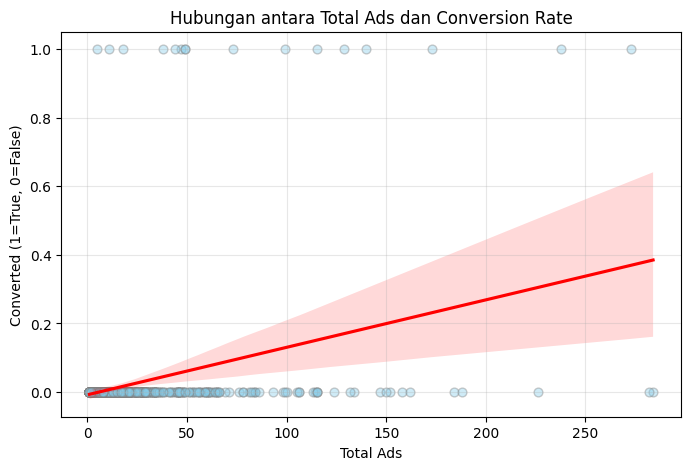

In [ ]:
sample_df['converted_num'] = sample_df['converted'].astype(int)

plt.figure(figsize=(8,5))
sns.regplot(
    x='total ads',
    y='converted_num',
    data=sample_df,
    logistic=False,
    scatter_kws={'alpha':0.4, 's':40, 'color':'skyblue', 'edgecolor':'gray'},
    line_kws={'color':'red'}
)

plt.title('Hubungan antara Total Ads dan Conversion Rate')
plt.xlabel('Total Ads')
plt.ylabel('Converted (1=True, 0=False)')
plt.grid(True, alpha=0.3)
plt.show()

Berdasarkan hasil uji korelasi dan visualisasi, implementasi fitur baru (“ad”) belum menunjukkan peningkatan konversi yang signifikan secara statistik. Meskipun terdapat hubungan positif (r = 0.31) antara frekuensi paparan iklan dan tingkat konversi, kekuatan hubungan tersebut masih lemah. Artinya, pengguna yang lebih sering terpapar iklan memang cenderung memiliki kemungkinan konversi lebih tinggi, namun peningkatan jumlah iklan tidak serta-merta menjamin kenaikan konversi yang besar. Kemungkinan terdapat efek saturasi, di mana terlalu sering menampilkan iklan justru dapat menurunkan minat pengguna.

#📊 Interpretasi Lengkap Hasil Analisis A/B Testing dan Korelasi

1. Tujuan Analisis

Analisis ini bertujuan untuk mengetahui apakah tampilan fitur baru (“ad”) memiliki pengaruh terhadap peningkatan konversi pengguna dibandingkan dengan tampilan lama (“psa”). Selain itu, dilakukan analisis korelasi untuk melihat hubungan antara frekuensi paparan iklan (total ads) dengan tingkat konversi pengguna.

2. Hasil Uji Perbandingan (A/B Testing - Chi-Square Test)

Uji Pearson Chi-Square dilakukan untuk membandingkan tingkat konversi antara dua kelompok pengguna:

- Kelompok kontrol (PSA): Pengguna yang hanya melihat pengumuman layanan publik.

- Kelompok eksperimen (AD): Pengguna yang melihat iklan promosi produk.

Hasil uji menunjukkan:

- χ² (Chi-Square Statistic) = 0.0368

- p-value = 0.8478

- alpha = 0.05

- Interpretasi:
Karena nilai p-value (0.8478) jauh lebih besar dari 0.05, maka tidak ada perbedaan signifikan secara statistik antara kelompok pengguna yang melihat iklan dan kelompok yang melihat pengumuman layanan publik. Dengan demikian, implementasi fitur iklan (“ad”) belum terbukti meningkatkan tingkat konversi secara signifikan dibandingkan fitur lama.

3. Hasil Analisis Korelasi antara Frekuensi Iklan dan Konversi

Untuk melihat apakah semakin sering pengguna terpapar iklan akan meningkatkan kemungkinan konversi, dilakukan analisis korelasi antara variabel:

- total_ads = jumlah paparan iklan yang dilihat oleh pengguna

- converted = status konversi pengguna (1 = True, 0 = False)

Hasil uji korelasi menunjukkan:

- Koefisien Korelasi Pearson (r) = 0.3166

- p-value = 5.94 × 10⁻¹⁷

- Interpretasi:
Nilai koefisien korelasi sebesar 0.31 menunjukkan hubungan positif yang lemah antara frekuensi paparan iklan dan tingkat konversi. Artinya, semakin sering pengguna melihat iklan, cenderung ada sedikit peningkatan kemungkinan mereka melakukan konversi, namun pengaruhnya tidak terlalu kuat.
Meskipun secara statistik signifikan (p < 0.05), secara praktis pengaruhnya masih kecil, sehingga peningkatan frekuensi iklan tidak menjamin peningkatan konversi yang besar.


4. Insight dan Implikasi Bisnis

- Efektivitas fitur baru (iklan) belum terbukti signifikan dalam meningkatkan konversi dibandingkan tampilan PSA.

- Frekuensi iklan memiliki pengaruh positif terhadap konversi, namun dengan kekuatan yang lemah.

- Terdapat kemungkinan adanya efek saturasi (kejenuhan iklan), di mana pengguna yang terlalu sering terpapar iklan justru mulai mengabaikannya.

- Strategi berikutnya bisa berfokus pada optimasi kualitas iklan, bukan hanya meningkatkan jumlah tayangan — misalnya dengan personalisasi konten atau penyesuaian waktu penayangan.

5. Kesimpulan Akhir

Secara keseluruhan, analisis menunjukkan bahwa fitur baru (ad) belum memberikan dampak signifikan terhadap peningkatan konversi. Meskipun terdapat korelasi positif antara jumlah iklan dan konversi, kekuatannya masih lemah. Oleh karena itu, peningkatan efektivitas kampanye iklan kemungkinan lebih bergantung pada relevansi dan kualitas pesan iklan daripada sekadar frekuensinya.